In [1]:
import seaborn as sns
import pandas as pd

In [2]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

In [3]:
test_df.head()

,y,x1,x2
0,585.419191,1997,1
1,269.365326,1988,3
2,317.658704,1989,4
3,400.653320,1986,11
4,444.240501,1987,12


In [4]:
train_df.head()

,y,x1,x2
0,737.721966,1994,17
1,372.012721,1987,11
2,298.244694,1990,4
3,353.815829,1991,5
4,899.943226,1998,15


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       140 non-null    float64
 1   x1      140 non-null    int64  
 2   x2      140 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.4 KB


In [6]:

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       60 non-null     float64
 1   x1      60 non-null     int64  
 2   x2      60 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.5 KB


In [7]:
train_df.shape

(140, 3)

In [8]:
test_df.shape

(60, 3)

In [9]:
train_df.x1 = train_df.x1.astype('float')
train_df.x2 = train_df.x2.astype('float')

In [10]:
test_df.x1 = test_df.x1.astype('float')
test_df.x2 = test_df.x2.astype('float')

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       140 non-null    float64
 1   x1      140 non-null    float64
 2   x2      140 non-null    float64
dtypes: float64(3)
memory usage: 3.4 KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       60 non-null     float64
 1   x1      60 non-null     float64
 2   x2      60 non-null     float64
dtypes: float64(3)
memory usage: 1.5 KB


<AxesSubplot:>

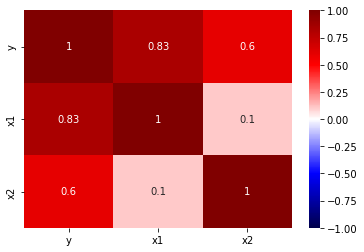

In [37]:
sns.heatmap(train_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

<AxesSubplot:>

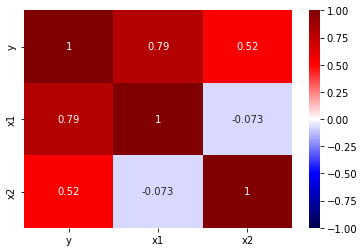

In [36]:
sns.heatmap(test_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

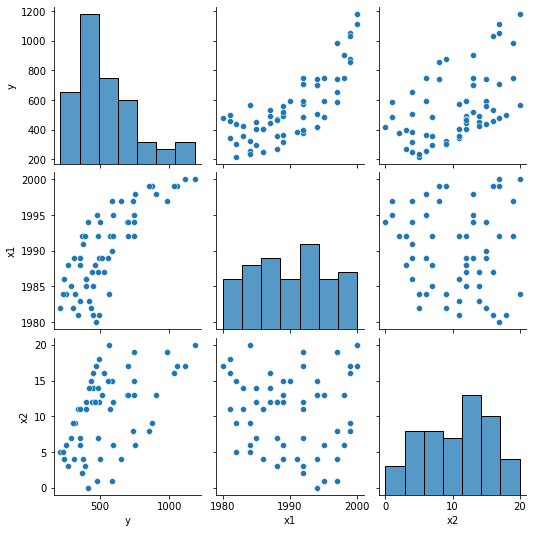

In [15]:
sns.pairplot(test_df)

In [16]:
train_df.x2.value_counts()

6.0     10
8.0     10
16.0    10
10.0     9
19.0     9
4.0      8
13.0     8
5.0      7
15.0     7
18.0     7
12.0     7
1.0      6
17.0     6
20.0     6
11.0     6
9.0      6
2.0      6
3.0      4
7.0      4
14.0     3
0.0      1
Name: x2, dtype: int64

In [17]:
train_df.x1.value_counts()

1986.0    10
1993.0     9
1985.0     9
1995.0     9
1992.0     8
1987.0     8
1984.0     8
1994.0     7
1998.0     7
1983.0     7
1997.0     6
1991.0     6
1996.0     6
1988.0     6
1982.0     6
1981.0     6
2000.0     5
1999.0     5
1989.0     5
1990.0     5
1980.0     2
Name: x1, dtype: int64

In [18]:
from sklearn import preprocessing

In [19]:
train_df.columns

Index(['y', 'x1', 'x2'], dtype='object')

In [20]:
train_df.corr()

,y,x1,x2
y,1.000000,0.833629,0.600127
x1,0.833629,1.000000,0.102905
x2,0.600127,0.102905,1.000000


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [23]:
train_X = train_df[['x1', 'x2']]

In [24]:
train_y = train_df.y

In [25]:
lr.fit(train_X,train_y)

LinearRegression()

In [26]:
r_squared_train = lr.score(train_X, train_y)
print(f"{r_squared_train:,.3f}")

0.962


In [27]:
test_X = test_df[['x1', 'x2']]
test_y = test_df.y


In [29]:
r_squared_test = lr.score(test_X, test_y)
print(f"{r_squared_test:,.3f}")

0.957


In [30]:
from sklearn.metrics import mean_squared_error
preds_train = lr.predict(train_X)
rmse_train = mean_squared_error(train_y, preds_train, squared=False)
rmse_train

71.50244606318006

In [31]:
preds_test = lr.predict(test_X)
rmse_test = mean_squared_error(test_y, preds_test, squared=False)
rmse_test

46.952118786802444

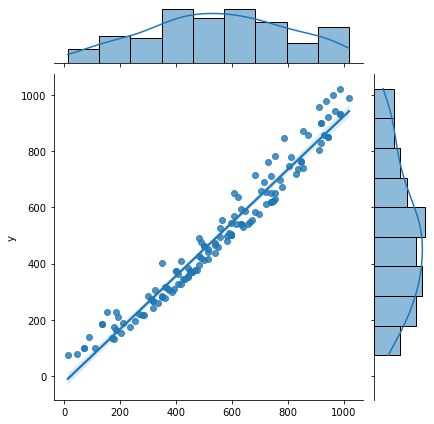

In [32]:
sns.jointplot(x=preds_train,y=train_y, kind='reg');

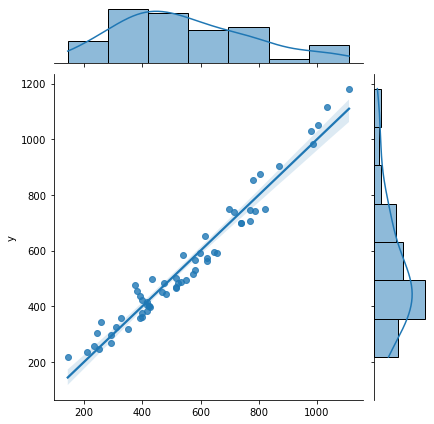

In [33]:
sns.jointplot(x=preds_test,y=test_y, kind='reg');